In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Moyenne Par Mois

In [58]:
tab = pd.read_csv('../csv/tableau_brut.csv')

tab['Date'] = pd.to_datetime(tab['Date'])

tab = tab.set_index('Date')

tab = np.round(tab.groupby(['variable', pd.Grouper(freq="M")], as_index=True)['value'].mean(), decimals = 2)

tab = tab.reset_index()

tab.head()

,variable,Date,value
0,Brent (EUR/barrel),2015-01-31,NaN
1,Brent (EUR/barrel),2015-02-28,NaN
2,Brent (EUR/barrel),2015-03-31,NaN
3,Brent (EUR/barrel),2015-04-30,NaN
4,Brent (EUR/barrel),2015-05-31,NaN


## Remplissage des NaN

In [59]:
tab = tab.groupby('variable').apply(lambda x: x.ffill().bfill())

tab.head()

,variable,Date,value
0,Brent (EUR/barrel),2015-01-31,46.82
1,Brent (EUR/barrel),2015-02-28,46.82
2,Brent (EUR/barrel),2015-03-31,46.82
3,Brent (EUR/barrel),2015-04-30,46.82
4,Brent (EUR/barrel),2015-05-31,46.82


## Affichage

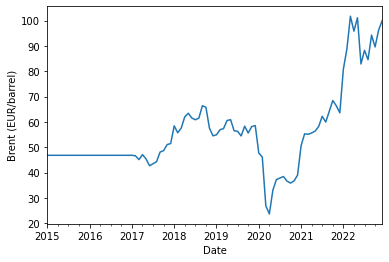

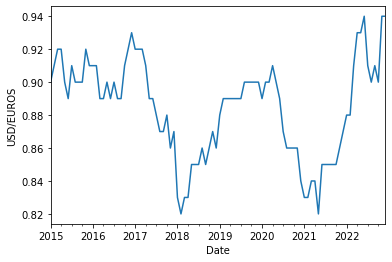

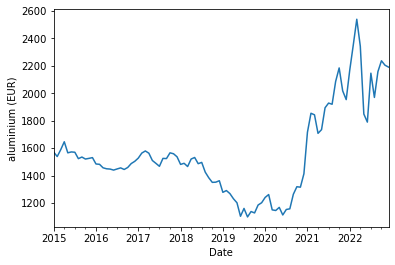

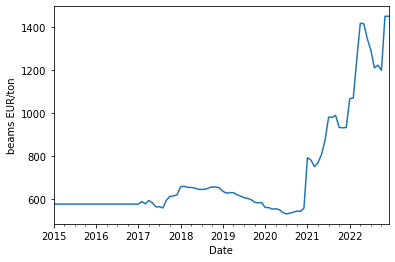

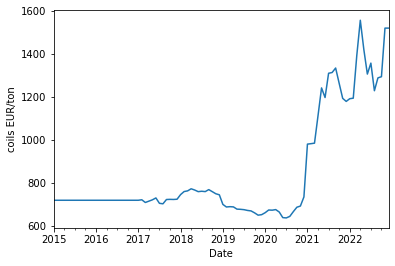

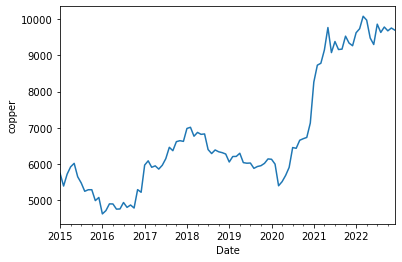

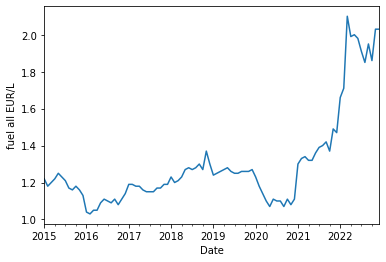

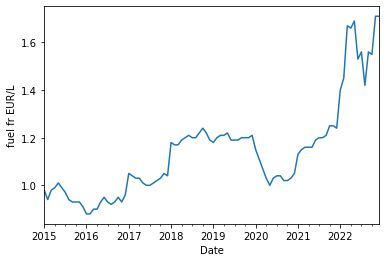

In [62]:
for elem in tab['variable'].unique():
    tab_to_plot = tab[tab['variable'] == elem].plot(x='Date', y='value', legend=False)
    plt.ylabel(elem)

## Enregistrement des données

In [64]:
tab.to_csv(r'../csv/tableau_final.csv')